# 데이터로드

In [40]:
# 컬럼 정보

# index : 인덱스
# SEND_SPG_INNB : 송하인_격자공간고유번호
# REC_SPG_INNB : 수하인 격자공간고유번호
# DL_GD_LCLS_NM : 카테고리_대
# DL_GD_MCLS_NM : 카테고리_중
# INVC_CONT : 운송장 건 수

# 택배 운송량을 예측하여 비대면 경제의 발전을 예측

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline

train = pd.read_csv('C:/Users/wnrrh/desktop/dacon/택배 운송량 예측 경진대회/train.csv',encoding='utf-8')
test = pd.read_csv('C:/Users/wnrrh/desktop/dacon/택배 운송량 예측 경진대회/test.csv',encoding='utf-8')
ss = pd.read_csv('C:/Users/wnrrh/desktop/dacon/택배 운송량 예측 경진대회/sample_submission.csv',encoding='utf-8')
train.set_index('index',inplace=True)
test.set_index('index',inplace=True)

In [41]:
train

,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT
index,,,,,
0,1.129000e+15,5.011000e+15,패션의류,상의,3
1,1.135000e+15,5.011000e+15,생활/건강,반려동물,3
2,1.135000e+15,5.011000e+15,패션의류,기타패션의류,9
3,1.154500e+15,5.011000e+15,식품,농산물,10
4,1.165000e+15,5.011000e+15,식품,가공식품,3
...,...,...,...,...,...
31995,5.011000e+15,2.635000e+15,식품,농산물,6
31996,5.011000e+15,1.168000e+15,식품,기타식품,5
31997,5.011000e+15,4.119700e+15,식품,농산물,9


In [42]:
# index, 종속변수 제거
X_train = train.iloc[:,1:5]
# 종속변수(y) -> 운송량
y_train = train.iloc[:, -1]
X_test = test

train.shape
train.tail()
train.head(10)

# 결측치 확인 - 없음 
train.isnull().sum()
y_train.isnull().sum()


# 카테고리별 개수

print('카테고리_대 : ', len(train['DL_GD_LCLS_NM'].unique()))
print('카테고리_중 : ', len(train['DL_GD_MCLS_NM'].unique()))

train['DL_GD_MCLS_NM']
train['DL_GD_MCLS_NM'].unique()


카테고리_대 :  6
카테고리_중 :  20


array(['상의', '반려동물', '기타패션의류', '농산물', '가공식품', '스킨케어', '기타식품', '생활용품',
       '건강식품', '주방용품', '건강용품', '냉동/간편조리식품', '문구/사무용품', '축산', '문화컨텐츠',
       '음반', '음료', '수산', '과자', '기타디지털/가전'], dtype=object)

# Encoding

In [43]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import numpy as np

# Label Encoding
# print(train['DL_GD_MCLS_NM'])
encoder_M = LabelEncoder()
encoder_M.fit(train['DL_GD_MCLS_NM'])
label_M = encoder_M.transform(train['DL_GD_MCLS_NM'])
print('encoder:', encoder_M)
print('encoder 결과:', label_M)
print('----------------------------------------------------------------')

print('decoder 결과:', encoder_M.inverse_transform(label_M))

print('----------------------------------------------------------------')
print(list(encoder_M.inverse_transform(label_M)))
# print(train['DL_GD_MCLS_NM'])
print('----------------------------------------------------------------')
print(len(encoder_M.classes_))


encoder: LabelEncoder()
encoder 결과: [12 11  6 ...  8  8  8]
----------------------------------------------------------------
decoder 결과: ['상의' '반려동물' '기타패션의류' ... '농산물' '농산물' '농산물']
----------------------------------------------------------------
['상의', '반려동물', '기타패션의류', '농산물', '가공식품', '스킨케어', '농산물', '기타패션의류', '가공식품', '기타식품', '생활용품', '건강식품', '주방용품', '가공식품', '건강용품', '냉동/간편조리식품', '냉동/간편조리식품', '건강용품', '건강식품', '건강식품', '건강식품', '문구/사무용품', '문구/사무용품', '축산', '상의', '주방용품', '기타식품', '농산물', '반려동물', '반려동물', '반려동물', '가공식품', '건강용품', '가공식품', '스킨케어', '문구/사무용품', '냉동/간편조리식품', '문화컨텐츠', '문화컨텐츠', '문화컨텐츠', '문화컨텐츠', '문화컨텐츠', '문화컨텐츠', '문화컨텐츠', '문화컨텐츠', '문화컨텐츠', '문화컨텐츠', '문화컨텐츠', '문화컨텐츠', '문화컨텐츠', '음반', '음반', '음료', '반려동물', '건강식품', '건강식품', '건강식품', '농산물', '주방용품', '가공식품', '가공식품', '건강식품', '냉동/간편조리식품', '음료', '건강식품', '반려동물', '건강식품', '건강용품', '기타식품', '기타식품', '생활용품', '냉동/간편조리식품', '음료', '음료', '반려동물', '문화컨텐츠', '건강식품', '건강식품', '수산', '건강용품', '과자', '주방용품', '수산', '농산물', '농산물', '농산물', '농산물', '농산물', '농산물', '농산물', '농산물', '농산물', '

In [39]:
encoder_L = LabelEncoder()
train['DL_GD_LCLS_NM'] = encoder_L.fit_transform(encoder_M.classes_)

ValueError: Length of values (20) does not match length of index (32000)

In [38]:
encoder_L = LabelEncoder()
encoder_L.fit(train['DL_GD_LCLS_NM'])
label_L = encoder_L.transform(encoder_L)
print('encoder:', encoder_L)
print('encoder 결과:', label_L)
print('----------------------------------------------------------------')
print('decoder 결과:', encoder_M.inverse_transform(label_M))

# train['DL_GD_LCLS_NM'] = encoder_L.fit_transform(encoder_M.classes_)
print('----------------------------------------------------------------')

Train = pd.get_dummies(train, columns = ['DL_GD_LCLS_NM', 'DL_GD_MCLS_NM'])

# Train
# # One hot Encoding
# label_ = labelL.reshape(-1,1)

# one_L = OneHotEncoder()
# label_L= one_L.fit_transform(label_)
# label_L.toarray()

# # one_M = OneHotEncoder()
# # train['DL_GD_MCLS_NM'] = one_M.fit_transform(train['DL_GD_MCLS_NM'])

ValueError: y should be a 1d array, got an array of shape () instead.

# 클래스 분포 확인

In [6]:
import numpy as np

X_train.loc[:, ['DL_GD_LCLS_NM', 'DL_GD_MCLS_NM']].value_counts()

# 카테고리 대 클래스 분포 확인
Large_cat = X_train['DL_GD_LCLS_NM'].value_counts()
# print(X_train['DL_GD_LCLS_NM'].value_counts())
print()
# 식품에 치우쳐있음
Mid_cat = X_train['DL_GD_MCLS_NM'].value_counts()
# print(X_train['DL_GD_MCLS_NM'].value_counts())



X_train_Cook = X_train.loc[:, ['DL_GD_LCLS_NM', 'DL_GD_MCLS_NM']][X_train['DL_GD_LCLS_NM'] == '식품']
X_train_Cook_ = X_train_Cook['DL_GD_MCLS_NM'].unique()
X_train_Cook_.shape

print(X_train.loc[:, ['DL_GD_LCLS_NM', 'DL_GD_MCLS_NM']].value_counts())
cook = X_train_Cook['DL_GD_MCLS_NM'].value_counts()



DL_GD_LCLS_NM  DL_GD_MCLS_NM
식품             농산물              22162
여행/문화          문화컨텐츠             1192
식품             음료                1126
               수산                 931
               가공식품               923
               기타식품               766
               건강식품               651
생활/건강          음반                 635
식품             축산                 418
               냉동/간편조리식품          413
생활/건강          반려동물               358
식품             과자                 348
생활/건강          생활용품               343
               주방용품               328
패션의류           상의                 321
               기타패션의류             261
디지털/가전         기타디지털/가전           241
화장품/미용         스킨케어               227
생활/건강          문구/사무용품            180
               건강용품               176
dtype: int64


# EDA 시각화

식품        27738
생활/건강      2020
여행/문화      1192
패션의류        582
디지털/가전      241
화장품/미용      227
Name: DL_GD_LCLS_NM, dtype: int64


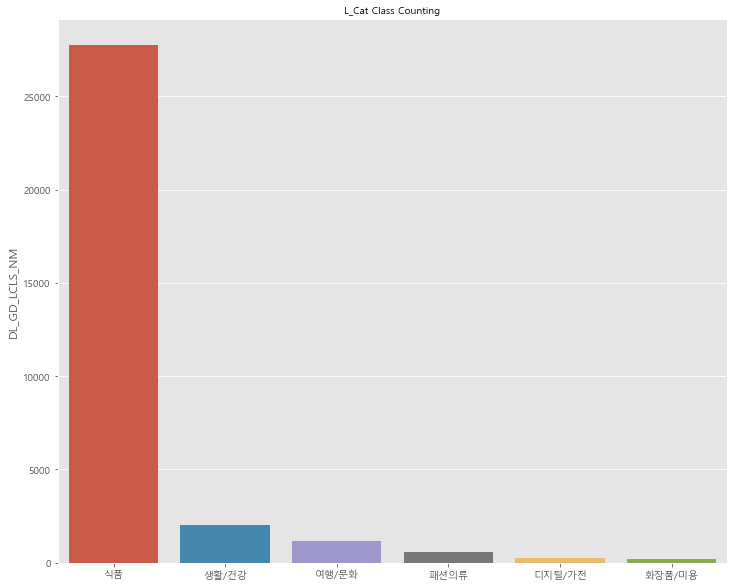

In [7]:
# 카테고리 대 클래스 분포

plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')
plt.figure(figsize=(12,10))
plt.title('L_Cat Class Counting', fontsize=10)
value_bar_ax = sns.barplot(x=Large_cat.index, y=Large_cat)
value_bar_ax.tick_params(labelsize=10)

print(Large_cat)

# 식품에 대해서 언더샘플링 필요

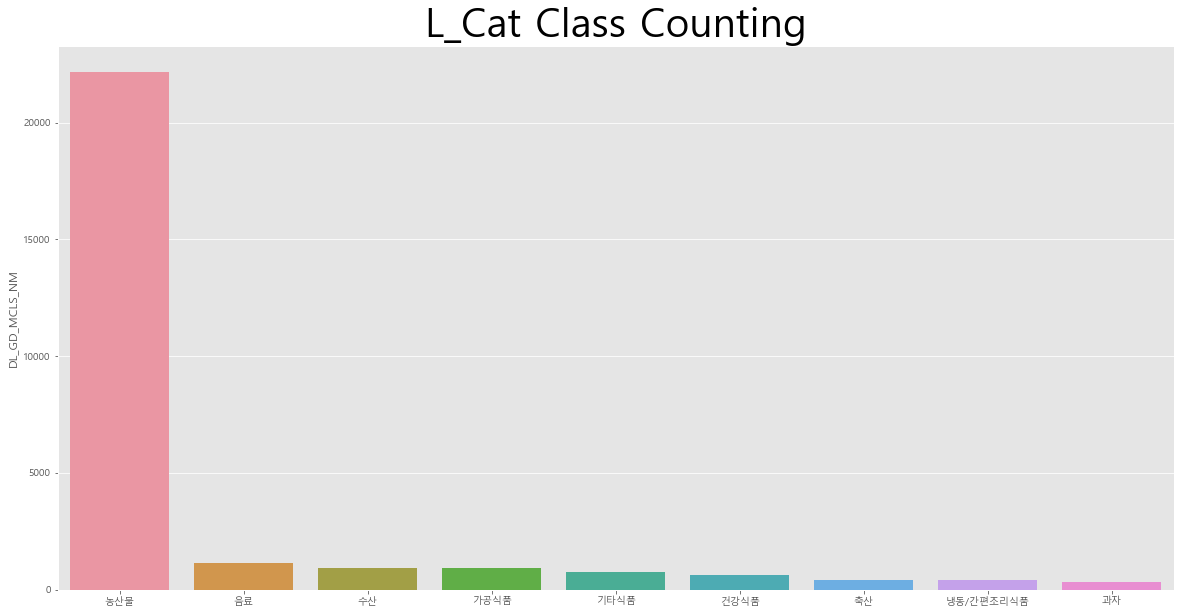

In [8]:
# 식품(대카테고리)안의 클래스 분포

plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.title('L_Cat Class Counting', fontsize=40)
value_bar_ax = sns.barplot(x=cook.index, y=cook)
value_bar_ax.tick_params(labelsize=10)

#  농산물에 대해서 언더샘플링 필요함

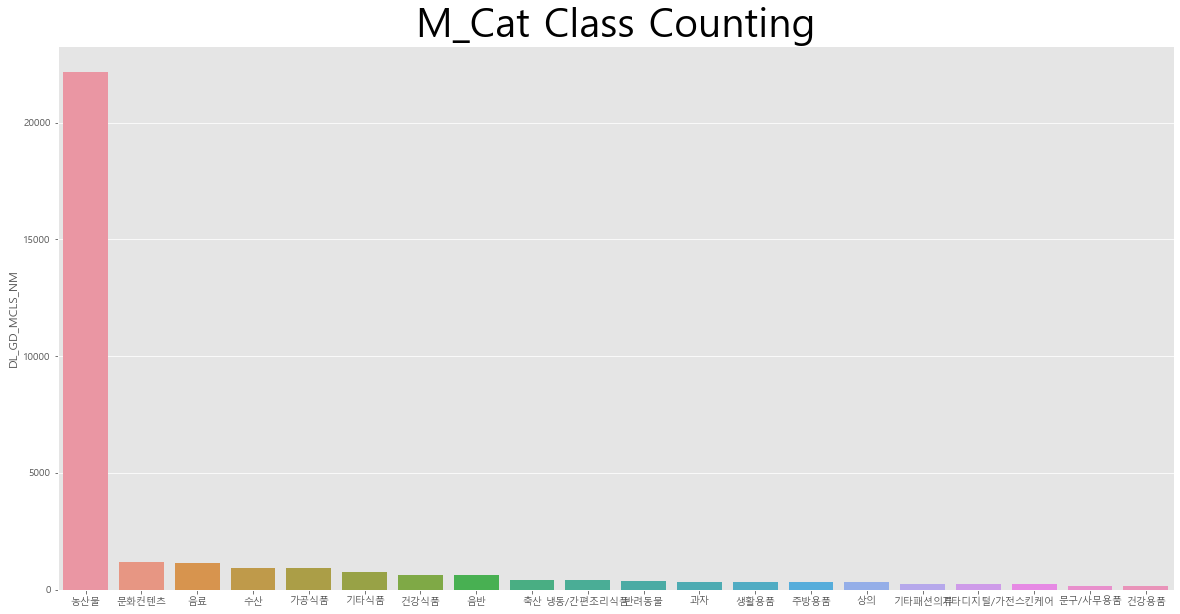

In [9]:
# 카테고리 중 클래스 분포

plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.title('M_Cat Class Counting', fontsize=40)
value_bar_ax = sns.barplot(x=Mid_cat.index, y=Mid_cat)
value_bar_ax.tick_params(labelsize=10)


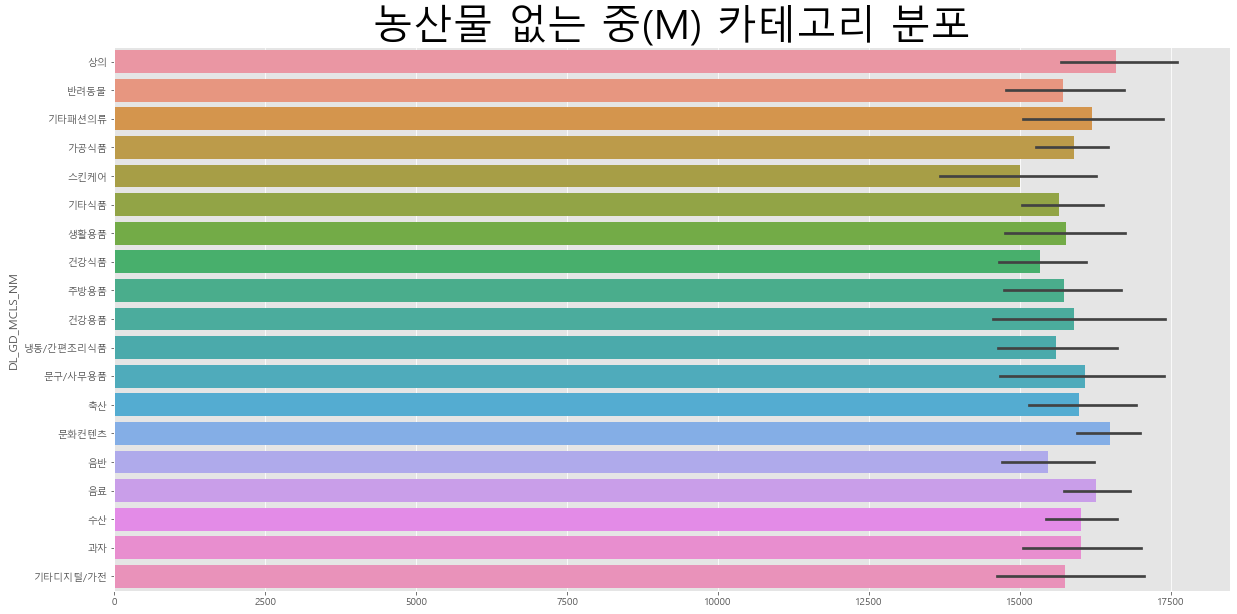

In [10]:
idx = X_train[X_train['DL_GD_MCLS_NM'] == '농산물'].index
mid = X_train.drop(idx, inplace = True)
x_cook = X_train['DL_GD_MCLS_NM']

plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.title('농산물 없는 중(M) 카테고리 분포', fontsize=40)
value_bar_ax = sns.barplot(x=x_cook.index, y=x_cook)
value_bar_ax.tick_params(labelsize=10)

# 종속변수 확인

In [11]:
y_sorted = y_train.sort_values(ascending = False)
y_count = len(y_train.unique())
print('운송량 개수 종류: ', y_count, '\n')

print(train['INVC_CONT'].describe(), '\n')

print('운송량 가장 많은 것: ', train[train['INVC_CONT']  == 239], '\n')

print('총운송량: ', train['INVC_CONT'].sum())

# 카테고리별 개수

print('카테고리_대 : ', len(train['DL_GD_LCLS_NM'].unique()))
print('카테고리_중 : ', len(train['DL_GD_MCLS_NM'].unique()))



운송량 개수 종류:  90 

count    32000.000000
mean         4.767875
std          5.752122
min          3.000000
25%          3.000000
50%          3.000000
75%          5.000000
max        239.000000
Name: INVC_CONT, dtype: float64 

운송량 가장 많은 것:         index  SEND_SPG_INNB  REC_SPG_INNB DL_GD_LCLS_NM  DL_GD_MCLS_NM  \
22968  22968   4.117300e+15  5.011000e+15          패션의류              6   

       INVC_CONT  
22968        239   

총운송량:  152572
카테고리_대 :  6
카테고리_중 :  20


In [12]:
# 농산물 없는 데이터 통계

idx = train[train['DL_GD_MCLS_NM'] == '농산물'].index
mid = train.drop(idx, inplace = True)
x_cook = train['DL_GD_MCLS_NM']
train.describe()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_MCLS_NM,INVC_CONT
count,32000.000000,3.200000e+04,3.200000e+04,32000.000000,32000.000000
mean,15999.500000,4.729981e+15,3.713145e+15,8.546219,4.767875
std,9237.748643,7.387136e+14,1.320618e+15,3.455411,5.752122
min,0.000000,1.111000e+15,1.111000e+15,0.000000,3.000000
25%,7999.750000,5.011000e+15,2.820000e+15,8.000000,3.000000
50%,15999.500000,5.011000e+15,4.146500e+15,8.000000,3.000000
75%,23999.250000,5.013000e+15,4.812350e+15,8.000000,5.000000
max,31999.000000,5.013000e+15,5.013000e+15,19.000000,239.000000


# 상관관계

In [22]:
plt.figure(figsize=(20,10))
plt.rc('axes', unicode_minus=False)

Train = pd.get_dummies(train, columns = ['DL_GD_LCLS_NM', 'DL_GD_MCLS_NM'])

heat_table = Train.drop(['index','SEND_SPG_INNB','REC_SPG_INNB', 'DL_GD_LCLS_NM_0',
                        'DL_GD_LCLS_NM_1','DL_GD_LCLS_NM_2','DL_GD_LCLS_NM_3','DL_GD_LCLS_NM_4',
                        'DL_GD_LCLS_NM_5'], axis=1).corr()
print(heat_table)
heatmap_ax = sns.heatmap(heat_table, annot=True, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=12, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=12)
plt.title('correlation between Mid_categories', fontsize=40)
plt.show()

plt.savefig("Corr.jpg")

KeyError: "['index' 'DL_GD_LCLS_NM_0' 'DL_GD_LCLS_NM_1' 'DL_GD_LCLS_NM_2'\n 'DL_GD_LCLS_NM_3' 'DL_GD_LCLS_NM_4' 'DL_GD_LCLS_NM_5'] not found in axis"

<Figure size 1440x720 with 0 Axes>

In [44]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 0 to 31999
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SEND_SPG_INNB            32000 non-null  float64
 1   REC_SPG_INNB             32000 non-null  float64
 2   INVC_CONT                32000 non-null  int64  
 3   DL_GD_LCLS_NM_디지털/가전     32000 non-null  uint8  
 4   DL_GD_LCLS_NM_생활/건강      32000 non-null  uint8  
 5   DL_GD_LCLS_NM_식품         32000 non-null  uint8  
 6   DL_GD_LCLS_NM_여행/문화      32000 non-null  uint8  
 7   DL_GD_LCLS_NM_패션의류       32000 non-null  uint8  
 8   DL_GD_LCLS_NM_화장품/미용     32000 non-null  uint8  
 9   DL_GD_MCLS_NM_가공식품       32000 non-null  uint8  
 10  DL_GD_MCLS_NM_건강식품       32000 non-null  uint8  
 11  DL_GD_MCLS_NM_건강용품       32000 non-null  uint8  
 12  DL_GD_MCLS_NM_과자         32000 non-null  uint8  
 13  DL_GD_MCLS_NM_기타디지털/가전   32000 non-null  uint8  
 14  DL_GD_MCLS_NM_기타식품    

In [ ]:
cat_features = Train.drop(['SEND_SPG_INNB','REC_SPG_INNB','INVC_CONT'],axis=1, inplace=True)

for col in cat_features:
    Train[col] = Train[col].astype('category')
